# Supplier Segmentation

Sometimes a company has many suppliers with different characteristics and interests. Therefore, suppliers need to be grouped into several sections to facilitate future management processes. One of the tools used to group suppliers is *Kraljic Matrix*.

<img src="https://user-images.githubusercontent.com/61647791/128868519-8462efae-994e-4f79-a64a-4fdcc871a8b4.png" width=300 height=300 />

*Source: Wikipedia* 

This tool divides suppliers into four parts based on risk/complexity and benefits for the company. Here are the four sections of the Kraljic Matric:

**1. Leverage items**

Suppliers with the Leverage category have low risk and provide high profits for the company. Suppliers of iron pipes for oil and gas companies are one example. Iron pipes are very important for oil and gas companies to transport oil from one place to another. In addition, iron pipe suppliers are easy to find.

**2. Strategic items**

Even though this type of supplier can provide high profits, the risk is very large. Suppose a company produces an oil with chemicals that are only produced by certain suppliers. If using these materials the quality of the oil will be better which has an impact on increasing company profits. The company must establish a relationship as well as possible because these suppliers are rarely found.

**3. Non-critical items**

This type of supplier has low risk and profit for the company. An example of this type is a paper supplier to a printing company. Paper suppliers are often found in the area so they can be categorized as non-critical.

**4. Bottleneck items**

A supplier with a bottleneck type has a low impact/profit for the company and the risk is very large. For example, an oil drilling company requires a component that is less crucial and needs to be replaced every 6 months. These components are cheap but require a waiting time *(lead time)* of almost one year with suppliers that are rarely found.

In this session, we will classify the suppliers based on the Kraljic Matrix using python. The source material and data are from the **Udemy-RA: Data Science and Supply Chain analytics course. A-Z with Python. Haytham Omar, Consultant-Supply chain.**

In [1]:
#Importing library
import pandas as pd
import numpy as np

The data used consists of several columns, namely:
1. **supplier** : supplier name (anonymous)
2. **product** : product name (anonymous)
3. **availability** : indicates availability risk (regular = 0, irregular = 0.5)
4. **no_suppliers** : shows the risk of the number of suppliers (many suppliers = 0, few suppliers = 0.5)
5. **standard** : indicates the risk of product/item complexity (standard = 0, complex = 0.5)
6. **price fluctuation** : shows the risk of price fluctuations (steady = 0, volatile = 0.5)
7. **Quantity** : the number of products ordered/required
8. **price** : price per product unit

In [2]:
supplier = pd.read_csv("supplier_data.csv")

supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


### 1. Calculate Risk Index
The risk index is the sum of risks from various factors, namely availability, no_suppliers, standard, and price_fluctuation.

In [3]:
supplier["risk_index"] = supplier["availability"] + supplier["no_suppliers"] + supplier["standard"] + supplier["price_fluctuation"]

### 2. Calculate Value
Value is the product of Quantity and Price

In [4]:
supplier["value"] = supplier["Quantity"] * supplier["price"]
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


### 3. Grouping Supplier According Risk Index and Value
In this session, a supplier is said to have a high risk if the risk index value is **more than or equal to one.** Meanwhile, to determine which supplier provides high or low profit for the company, it is determined by the **median of the value distribution**. 

In [5]:
supplier["value"].describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

Due to the median distribution of values ​​above approximately 3 million, suppliers that provide benefits to the company have a value of more than or equal to 3 million and vice versa. Next, we will create a function to group suppliers.

In [6]:
def category(risk_index, value):
    if ((risk_index >= 1) and (value >= 3000000)):
        return "Strategic"
    
    elif ((risk_index < 1) and (value >= 3000000)):
        return "Leverage"
    
    elif ((risk_index >= 1) and (value < 3000000)):
        return "Bottleneck"
    
    elif ((risk_index < 1) and (value < 3000000)):
        return "Non-critical"

To use the above function, I created a for loop to iterate over and apply the function to each row. We can check the result by calling the supplier table.

In [7]:
for i in range(supplier.shape[0]):
    supplier.loc[i,"Category"] = category(supplier.loc[i,"risk_index"], supplier.loc[i,"value"])

In [8]:
supplier

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,Category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,Bottleneck
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,Strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,Strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,Strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,Leverage
5,supplier1,product_6,0.0,0.5,0.0,0.0,3663,917,0.5,3358971,Leverage
6,supplier2,product_7,0.5,0.0,0.5,0.0,3517,2639,1.0,9281363,Strategic
7,supplier2,product_8,0.5,0.0,0.5,0.0,450,1384,1.0,622800,Bottleneck
8,supplier2,product_9,0.5,0.0,0.5,0.0,1438,842,1.0,1210796,Bottleneck
9,supplier2,product_10,0.5,0.0,0.5,0.0,2887,323,1.0,932501,Bottleneck


We can also visualize the above data using the matplotlib and seaborn libraries.

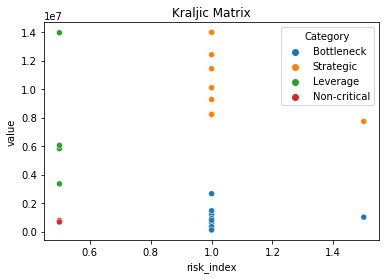

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=supplier, x="risk_index", y="value", hue="Category")
plt.title("Kraljic Matrix")
plt.show()

This is a short tutorial for segmenting suppliers using python, sorry if there are shortcomings or errors. That is all and thank you. Good luck :)
